<a href="https://colab.research.google.com/github/albin2122/Credit-card-reporting/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 3: Data-driven Insights and Reporting**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

# Introduction to Dataset

### Dataset Loading

In [17]:
# Load Dataset
credit_df=pd.read_excel('/content/drive/MyDrive/MYM/Task 3/credit_card.xls',header=1)

### Dataset First View

In [18]:
# Dataset First Look
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [19]:
# Dataset Rows & Columns count
row_count=credit_df.shape[0]
column_count=credit_df.shape[1]
print(f'no of rows is {row_count} ')
print(f'no of columns is {column_count}')

no of rows is 30000 
no of columns is 25


### Dataset Information

In [20]:
# Dataset Info
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [21]:
# Dataset Duplicate Value Count
credit_df[credit_df.duplicated()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Missing Values/Null Values

In [22]:
# Missing Values/Null Values Count
missing_value=credit_df.isnull().sum()
print(missing_value)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables: \
* ID: Unique ID of each client \
* LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. \
* Gender: 1 = male; 2 = female \
* Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others \
* Marital status: 1 = married; 2 = single; 3 = others). \
* Age: Age in years \


**History of past payment.** \

We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. \
* PAY_0: Repayment status in September, 2005

* PAY_2: Repayment status in August, 2005

* PAY_3: Repayment status in July, 2005

* PAY_4: Repayment status in June, 2005

* PAY_5: Repayment status in May, 2005

* PAY_6: Repayment status in April, 2005 \



**Amount of bill statement (NT dollar). \**

* BILL_AMT1: Amount of bill statement in September, 2005

* BILL_AMT2: Amount of bill statement in August, 2005

* BILL_AMT3: Amount of bill statement in July, 2005

* BILL_AMT4: Amount of bill statement in June, 2005

* BILL_AMT5: Amount of bill statement in May, 2005

* BILL_AMT6: Amount of bill statement in April, 2005
* default.payment.next.month: Default payment (1=yes, 0=no)

## Cleaning the Datset

### Data Wrangling Code

Column Education

In [23]:
# Write your code to make your dataset analysis ready.
credit_df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others , but here it contains 0,5,6 which can be included in the others group. So to avoid more complexity we could replace the values with the value 4

In [24]:
fill = (credit_df.EDUCATION == 0) | (credit_df.EDUCATION == 5) | (credit_df.EDUCATION == 6)
credit_df.loc[fill, 'EDUCATION'] = 4

In [25]:
credit_df['EDUCATION'].unique()

array([2, 1, 3, 4])

Changing name of the column default payment next month to Default to make it simple

In [26]:
credit_df = credit_df.rename(columns={'default payment next month': 'Default'})

In [27]:
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


Changing the name of column PAY_0 to PAY_1 since rest all start from 1 (like BILL_AMT1, PAY_AMT1)

In [28]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [29]:
credit_df = credit_df.rename(columns={'PAY_0': 'PAY_1'})

In [30]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

 Bill_Amt

In [31]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


the  minimum value of bill_amt1 is negative , but it should be greater than zero. probably a typing error. so we need to remove those rows with negative value

In [32]:
credit_df=credit_df[credit_df['BILL_AMT1'] >= 0]

In [33]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         29410 non-null  int64
 1   LIMIT_BAL  29410 non-null  int64
 2   SEX        29410 non-null  int64
 3   EDUCATION  29410 non-null  int64
 4   MARRIAGE   29410 non-null  int64
 5   AGE        29410 non-null  int64
 6   PAY_1      29410 non-null  int64
 7   PAY_2      29410 non-null  int64
 8   PAY_3      29410 non-null  int64
 9   PAY_4      29410 non-null  int64
 10  PAY_5      29410 non-null  int64
 11  PAY_6      29410 non-null  int64
 12  BILL_AMT1  29410 non-null  int64
 13  BILL_AMT2  29410 non-null  int64
 14  BILL_AMT3  29410 non-null  int64
 15  BILL_AMT4  29410 non-null  int64
 16  BILL_AMT5  29410 non-null  int64
 17  BILL_AMT6  29410 non-null  int64
 18  PAY_AMT1   29410 non-null  int64
 19  PAY_AMT2   29410 non-null  int64
 20  PAY_AMT3   29410 non-null  int64
 21  PAY_AMT4   2

## ***. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Education vs Default

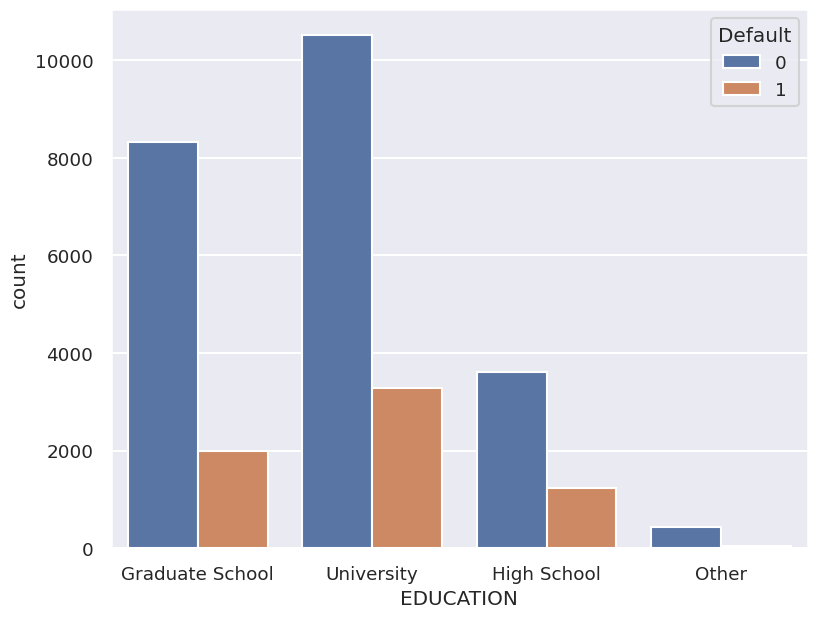

In [34]:
# Chart - 1 visualization code
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='Default', data=credit_df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [35]:
default0 = credit_df.groupby(credit_df['EDUCATION'][credit_df['Default'] == 0]).size().reset_index(name='NOT_Default')
default1 = credit_df.groupby(credit_df['EDUCATION'][credit_df['Default'] == 1]).size().reset_index(name='Default')
total = credit_df.groupby('EDUCATION').size().reset_index(name='TOTAL')

eduTable = default0.join(default1['Default']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Graduate School','University','High School','Other']
eduTable['NOT_Default'] = round((default0['NOT_Default']/total['TOTAL'])*100,2)
eduTable['Default'] = round((default1['Default']/total['TOTAL'])*100,2)

eduPct = eduTable.iloc[:,0:3]
eduPct = eduPct.rename(columns={'NOT_Default': 'NOT_Default(%)', 'Default': 'Default(%)'})

eduPct

,EDUCATION,NOT_Default(%),Default(%)
0,Graduate School,80.76,19.24
1,University,76.19,23.81
2,High School,74.71,25.29
3,Other,92.81,7.19


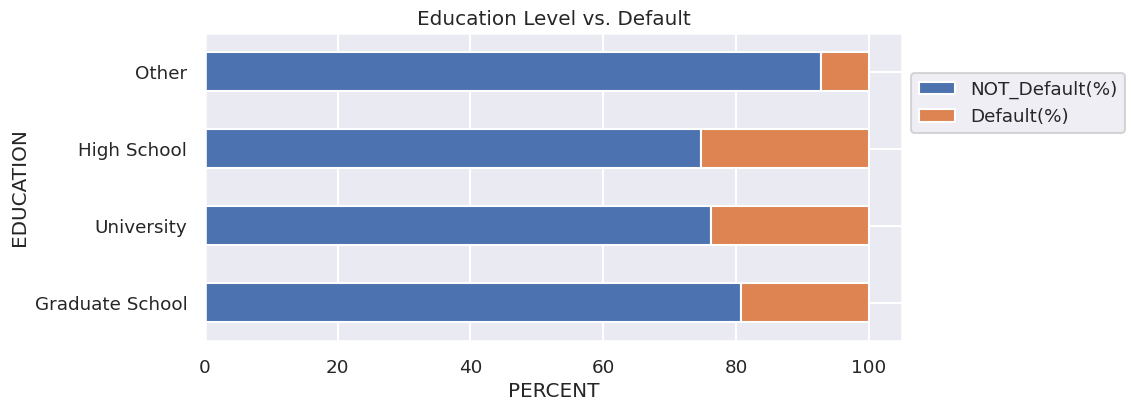

In [36]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = eduPct.plot(x='EDUCATION', kind='barh', stacked=True, title='Education Level vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()


##### 2. What is/are the insight(s) found from the chart?

* default count is lesser for high school ,but as per default percentage High School level have higher chance of Default.



 High school level shows high level of default, this does show the immaturity of the high school level and it is advisable not to give credits or rather there should be strict measures to taken care while giving credit

#### Chart - 2 - Gender vs default

<Axes: xlabel='SEX', ylabel='count'>

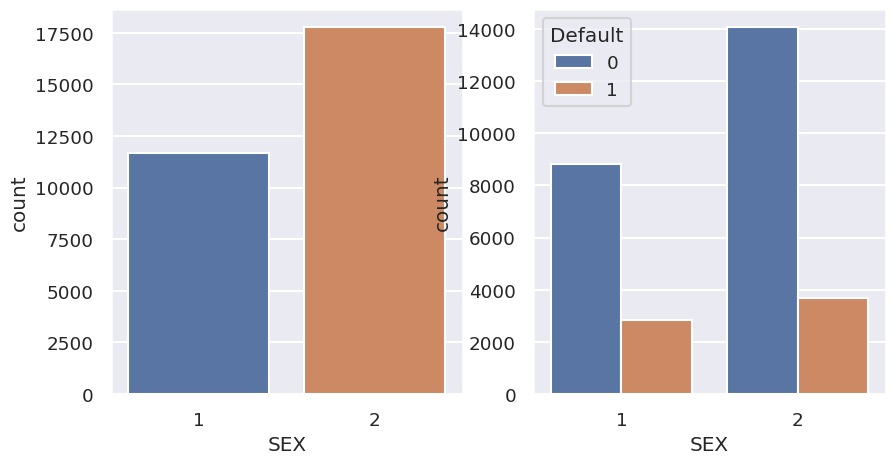

In [37]:
# Chart - 2 visualization code
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = credit_df)
sns.countplot(x = 'SEX', hue = 'Default',ax = axes[1], data = credit_df)


##### 2. What is/are the insight(s) found from the chart?

* Gender female has higher number of  credit cards than male as per the data
* The default count is comparitively same for both the genders hence gender doesnot become a criteria for defaulting.

As we found from the chart that there is no direct relatioship between gender and defaulting, so giving credits doesnot apply the feature gender

#### Chart - 3- Distribution of limit balance

Text(0.5, 1.0, 'Distribution Plot of Limit Balance')

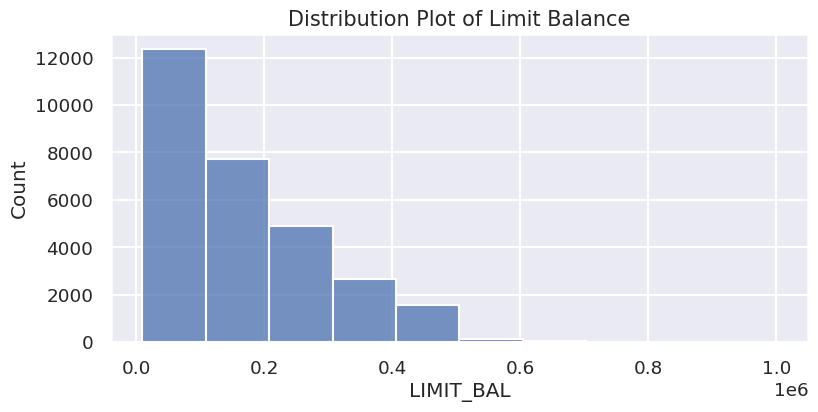

In [38]:
# Distribution analysis of Limit Balance
hist = sns.histplot(credit_df['LIMIT_BAL'],bins=10)
hist.set_title('Distribution Plot of Limit Balance', size=15)

##### 2. What is/are the insight(s) found from the chart?

Most of the customers get up to 2 lakhs of credit limit balance.

#### Chart - 4 - limit bal and education level

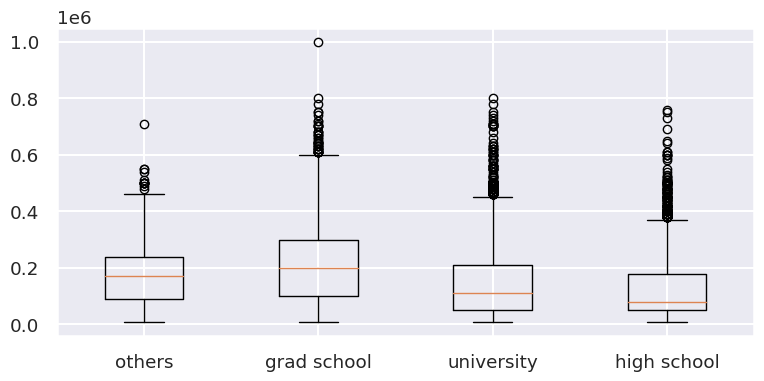

In [39]:
# Chart - 3 visualization code
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [4,1,2,3]:
    temp = credit_df.loc[credit_df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

##### 2. What is/are the insight(s) found from the chart?

From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.

It is important to know the credit card limit to different level of education , since each level shows the maturity of how sure they gave back.

#### Chart - 5 -Limit Balance vs Sex

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

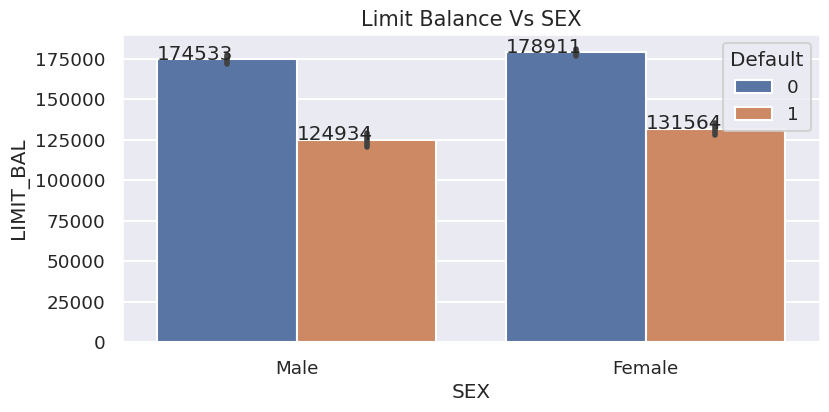

In [40]:
# Chart - 5 visualization code
# Limit Balance Vs SEX
bar = sns.barplot(data=credit_df, x='SEX', y='LIMIT_BAL',hue='Default')
bar.set_title('Limit Balance Vs SEX', size=15)

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Gender (1=male, 2=female)          
bar.set_xticklabels(['Male', 'Female'])

##### 2. What is/are the insight(s) found from the chart?

Female gets more credit limits than male but the default ratio is almost same 

Yes. As per the insights it is notable that male and female are having an average credit limit balance of 1.7 lakh

#### Chart - 6- Marital status and default payment

In [41]:
credit_df['MARRIAGE'].value_counts()

2    15661
1    13377
3      318
0       54
Name: MARRIAGE, dtype: int64

[Text(0, 0, 'Others'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Single'),
 Text(3, 0, 'Divorce')]

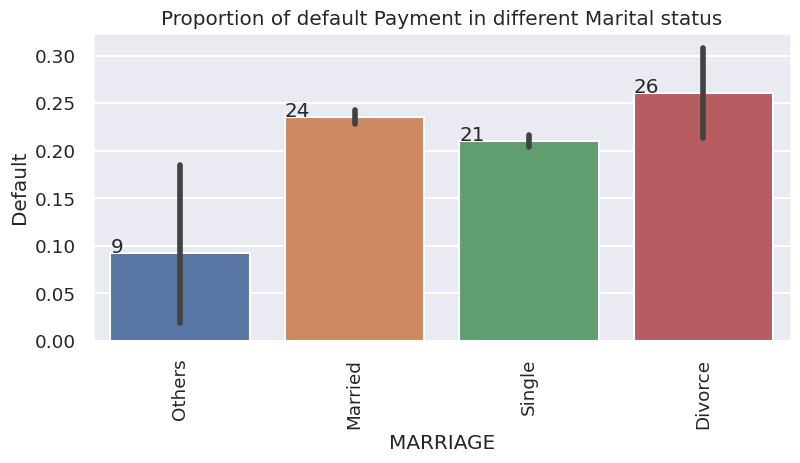

In [42]:
# Chart - 7 visualization code
# MARRIAGE Vs Default Payment
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='Default')
bar.set_title('Proportion of default Payment in different Marital status')

# adding value count on the top of bar
for p in bar.patches:
    bar.annotate(format(p.get_height()*100, '.0f'), (p.get_x(), p.get_height()))

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)

##### 2. What is/are the insight(s) found from the chart?

The number of defaults appears to be highest among divorced people (26%) and lowest among single people (21%) (ignoring "Others" due to the low count).

There is a high chance of default in payment with the people who are divorced when compared to others and lowest  default payment is by singles

#### Chart - 7- Marriage vs default payment with sex

In [43]:
# Chart - 6 visualization code
credit_df['MARRIAGE'].value_counts()

2    15661
1    13377
3      318
0       54
Name: MARRIAGE, dtype: int64

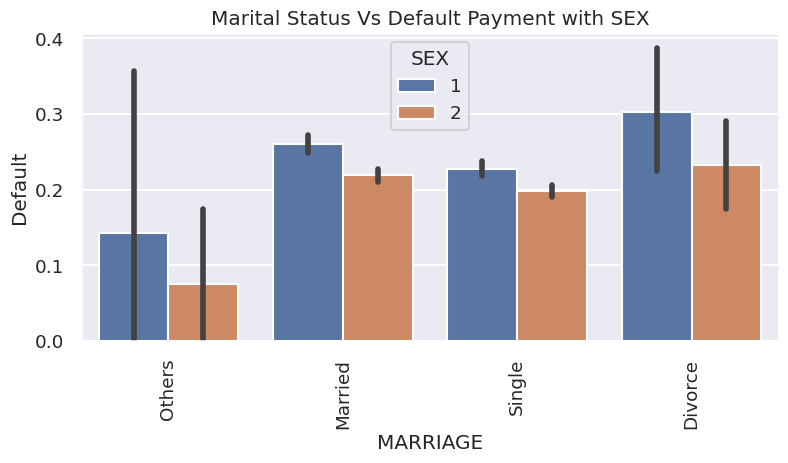

In [44]:
# MARRIAGE Vs Default Payment with SEX
bar = sns.barplot(data=credit_df, x='MARRIAGE', y='Default', hue='SEX')
bar.set_title('Marital Status Vs Default Payment with SEX')

# Assign labels to the x-axis categories   
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others)          
bar.set_xticklabels(['Others','Married','Single', 'Divorce'], rotation=90)
plt.show()
     

##### 2. What is/are the insight(s) found from the chart?

In all Marital status females have less default percentage than males.

#### Chart - 8 - boxplot

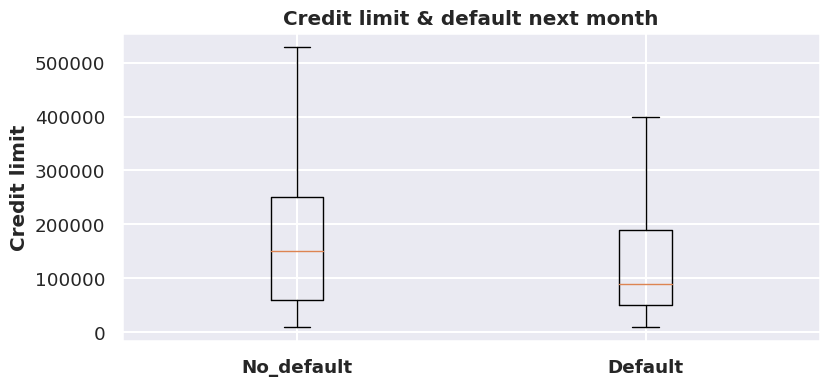

In [45]:
# Chart - 8 visualization code
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

default_0 = credit_df.loc[credit_df['Default'] == 0,'LIMIT_BAL']
default_1 = credit_df.loc[credit_df['Default'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([default_0, default_1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

##### 2. What is/are the insight(s) found from the chart?

peeple with higher credit limit tend to avoid any default payment , that is people having credit limit tries to pay on time higher compared to customers having lower credit limit

The amount of credit limit does matter but in a different way as we think. people having higher limit often pay back on time , eventhough they need to pay large amount of money than those having lower credit limit 

#### Chart - 9 - Age

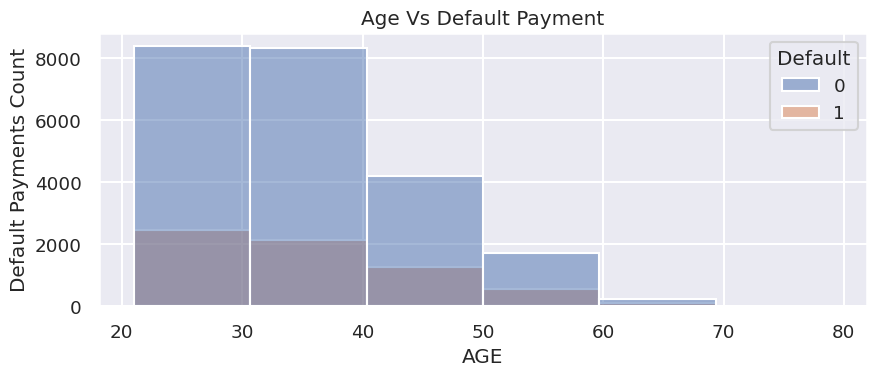

In [46]:
# Chart - 9 visualization code
# Age Vs Default Payment
figsize=(12,12)
hist = sns.histplot(data=credit_df, x='AGE', hue='Default', bins=6)
hist.set(title='Age Vs Default Payment',ylabel='Default Payments Count')
plt.tight_layout()
plt.show()
     

##### 2. What is/are the insight(s) found from the chart?

With an increase in the age group the count of default payments decreases.

#### Chart - 10- Bill amt vs default

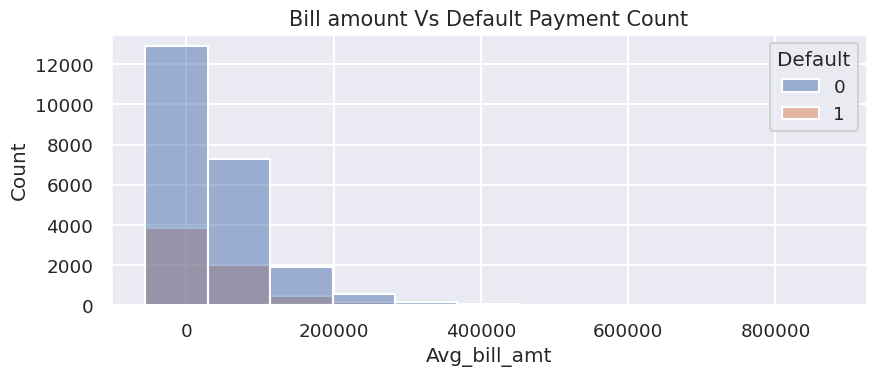

In [47]:
# Chart - 10 visualization code

credit_df['Avg_bill_amt'] =(credit_df['BILL_AMT1']+credit_df['BILL_AMT2']+credit_df['BILL_AMT3']+credit_df['BILL_AMT4']+credit_df['BILL_AMT5']+credit_df['BILL_AMT6'])/6
# Bill amount Vs Default Payment Count
hist = sns.histplot(data=credit_df, x='Avg_bill_amt', hue='Default',bins=11)
hist.set_title('Bill amount Vs Default Payment Count', size=15)
plt.tight_layout()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Most of the defaults are from customers who have negative and up to 2 lakh bill amount on an average in the last 6 months.

##  Feature Engineering & Data Pre-processing-  Identify relevant variables and relationships within the dataset.




### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation
credit_df.isnull().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_1           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
Default         0
Avg_bill_amt    0
dtype: int64

There isnt any null values

### 2. Handling Outliers

In [51]:
# splitting data into numerical and categorical features for future conveniance
numerical_features = []
categorical_features = []
for i in credit_df.columns:
  if credit_df[i].nunique() > 15:
    numerical_features.append(i)
  else:
    categorical_features.append(i)
print(f'numerical features are {numerical_features}')
print(f'categorical features are {categorical_features}')

numerical features are ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Avg_bill_amt']
categorical features are ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Default']


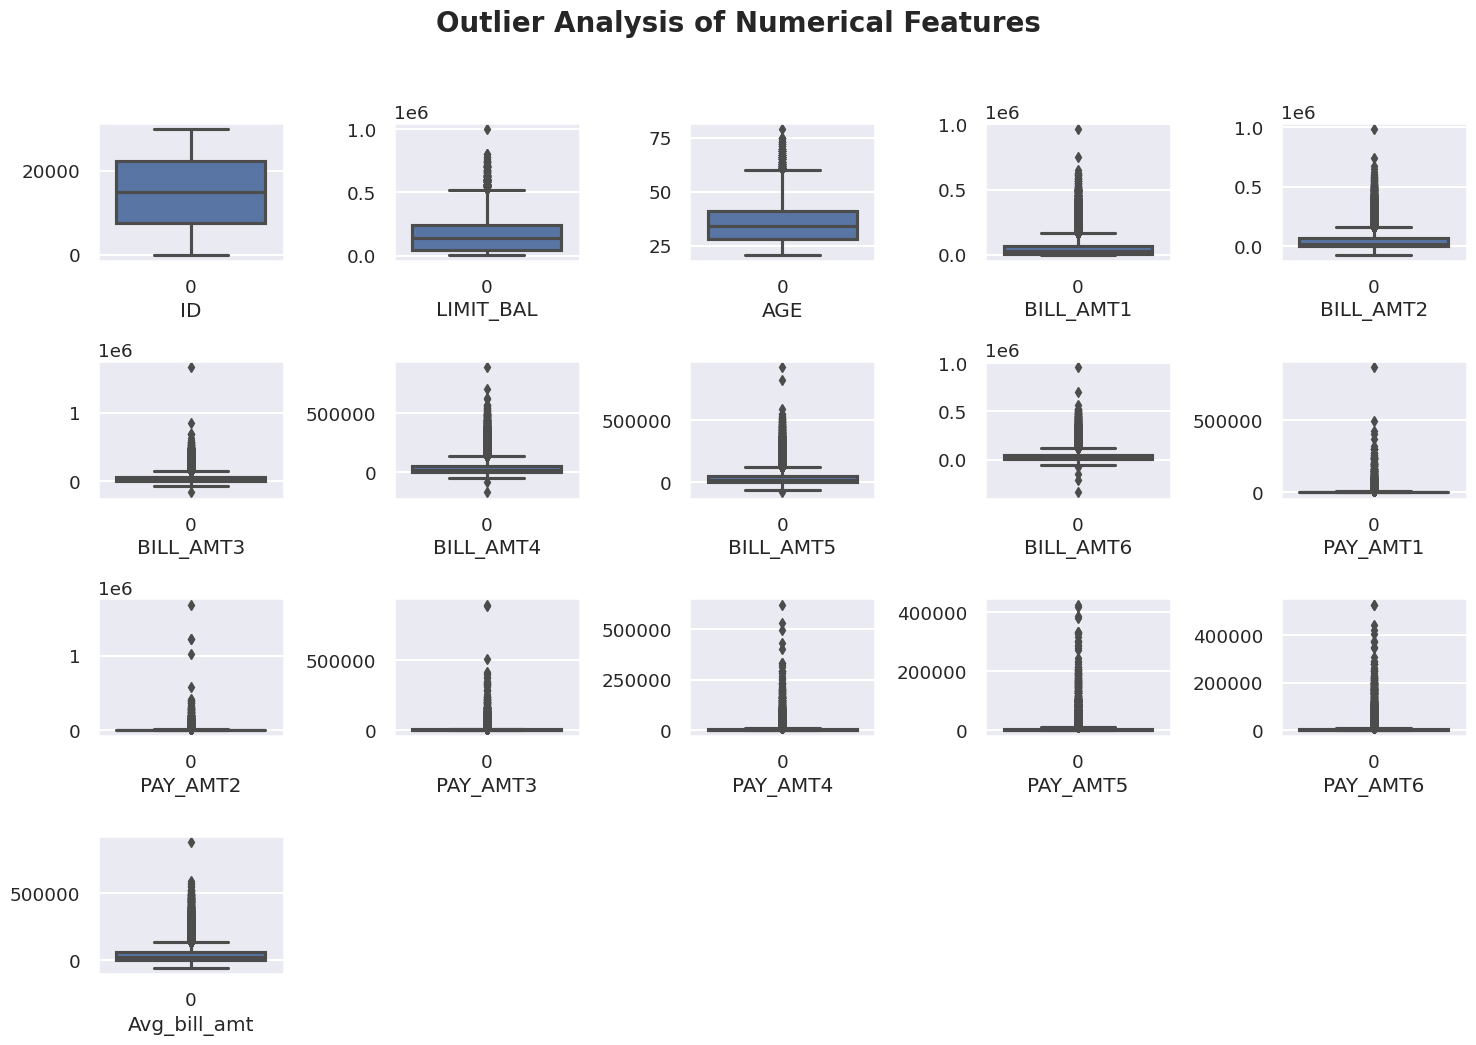

In [52]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

There are several outliers present in th data . Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. we are doing capping here to remove the outliers

In [53]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def capping_outliers(credit_df):
    for col in credit_df[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = credit_df[col].quantile(0.25)
        q3 = credit_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        credit_df[col] = credit_df[col].clip(lower_bound, upper_bound)
    return credit_df

In [54]:
# using the function to treat outliers
credit_df = capping_outliers(credit_df)

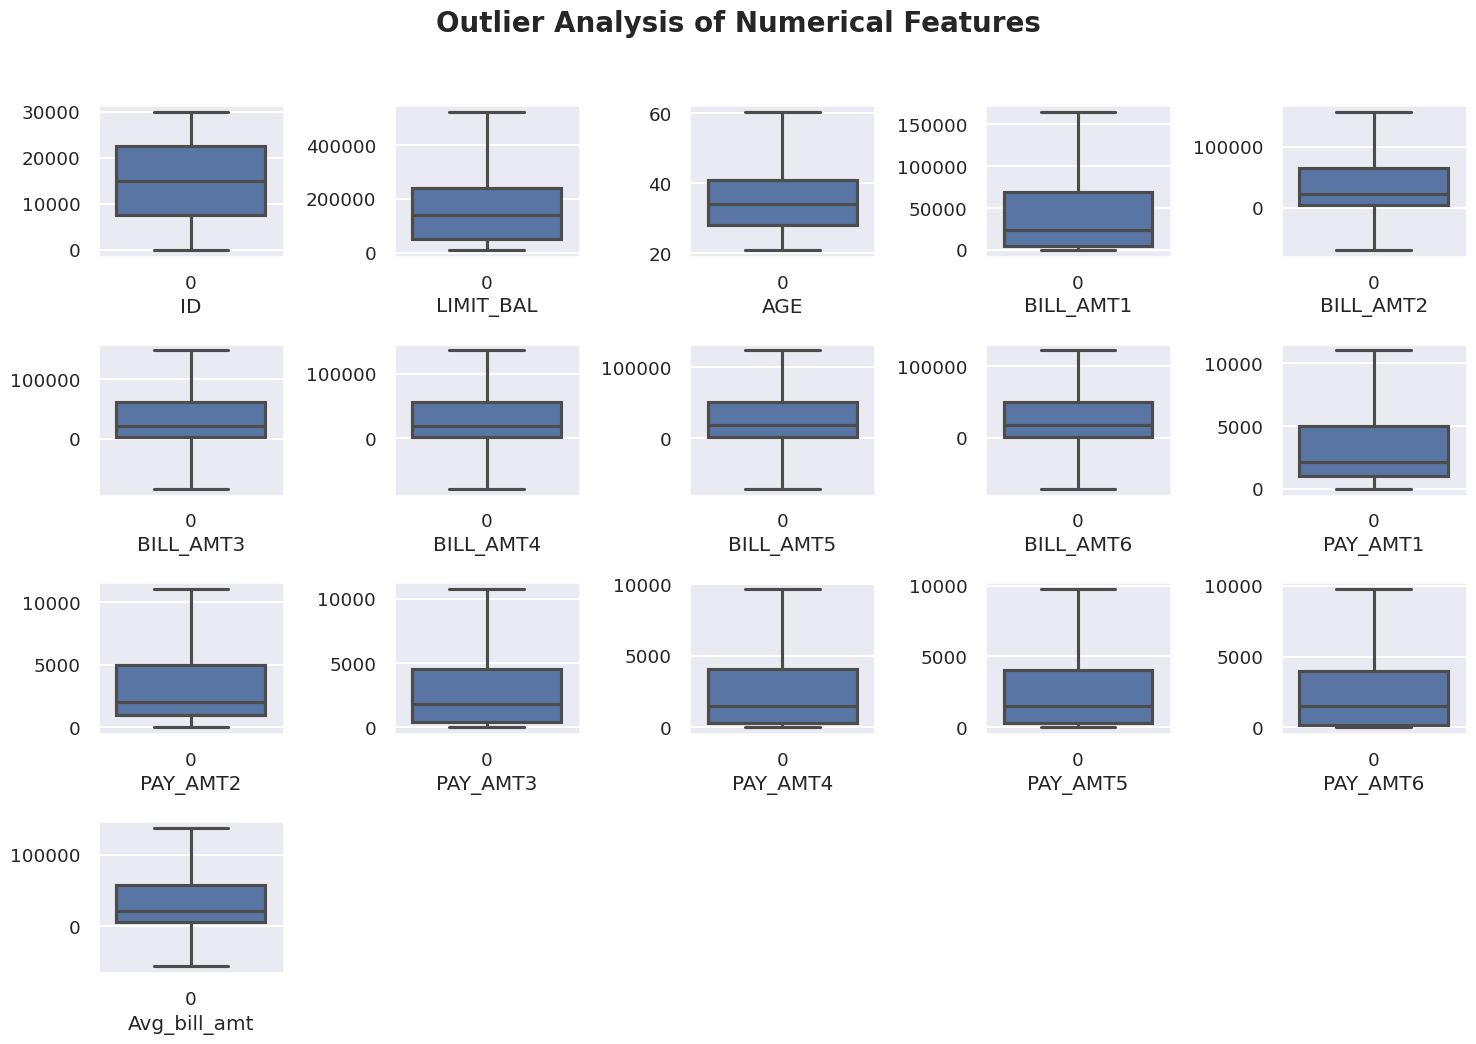

In [55]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(5, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(credit_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used capping method . in this method we are putting cap on outliers data , means if a value higher or lower than a certain threshold value, it is considered as oultiers and replacing those values with the lower bound value or upper bound value as per the nature of values.


### 3. Categorical Encoding

In [56]:
# Encode your categorical columns
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29410 non-null  int64  
 1   LIMIT_BAL     29410 non-null  int64  
 2   SEX           29410 non-null  int64  
 3   EDUCATION     29410 non-null  int64  
 4   MARRIAGE      29410 non-null  int64  
 5   AGE           29410 non-null  float64
 6   PAY_1         29410 non-null  int64  
 7   PAY_2         29410 non-null  int64  
 8   PAY_3         29410 non-null  int64  
 9   PAY_4         29410 non-null  int64  
 10  PAY_5         29410 non-null  int64  
 11  PAY_6         29410 non-null  int64  
 12  BILL_AMT1     29410 non-null  int64  
 13  BILL_AMT2     29410 non-null  float64
 14  BILL_AMT3     29410 non-null  float64
 15  BILL_AMT4     29410 non-null  float64
 16  BILL_AMT5     29410 non-null  float64
 17  BILL_AMT6     29410 non-null  float64
 18  PAY_AMT1      29410 non-nu

All the data in here either int or float , so there isnt any need of categorical encoding. we just need to change the datatype to object

In [57]:
categorical_features.remove('Default')

In [58]:
credit_df[categorical_features] = credit_df[categorical_features].astype(str)

In [59]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29410 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29410 non-null  int64  
 1   LIMIT_BAL     29410 non-null  int64  
 2   SEX           29410 non-null  object 
 3   EDUCATION     29410 non-null  object 
 4   MARRIAGE      29410 non-null  object 
 5   AGE           29410 non-null  float64
 6   PAY_1         29410 non-null  object 
 7   PAY_2         29410 non-null  object 
 8   PAY_3         29410 non-null  object 
 9   PAY_4         29410 non-null  object 
 10  PAY_5         29410 non-null  object 
 11  PAY_6         29410 non-null  object 
 12  BILL_AMT1     29410 non-null  int64  
 13  BILL_AMT2     29410 non-null  float64
 14  BILL_AMT3     29410 non-null  float64
 15  BILL_AMT4     29410 non-null  float64
 16  BILL_AMT5     29410 non-null  float64
 17  BILL_AMT6     29410 non-null  float64
 18  PAY_AMT1      29410 non-nu

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [60]:
# Manipulate Features to minimize feature correlation and create new features
credit_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,Avg_bill_amt
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1284.000000
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2846.166667


<Axes: >

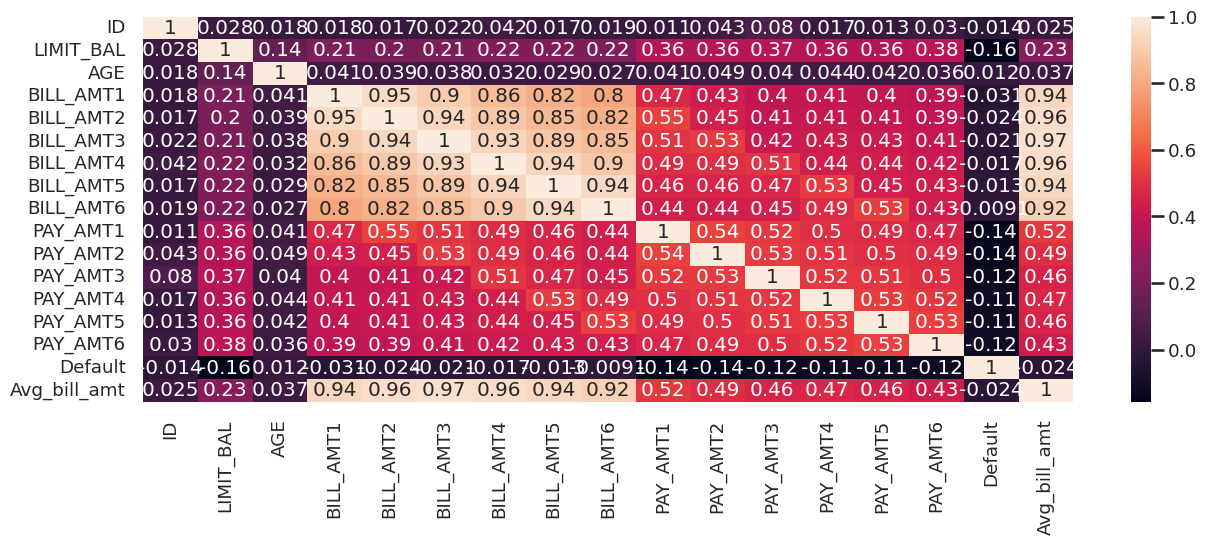

In [61]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(credit_df.corr(), annot=True)   

there is a high correlation between bill_amt variables, so we have to remove it leaving only one bill amt(bill_Amt1)

In [62]:
credit_df.drop(['Avg_bill_amt','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1, inplace=True)

<Axes: >

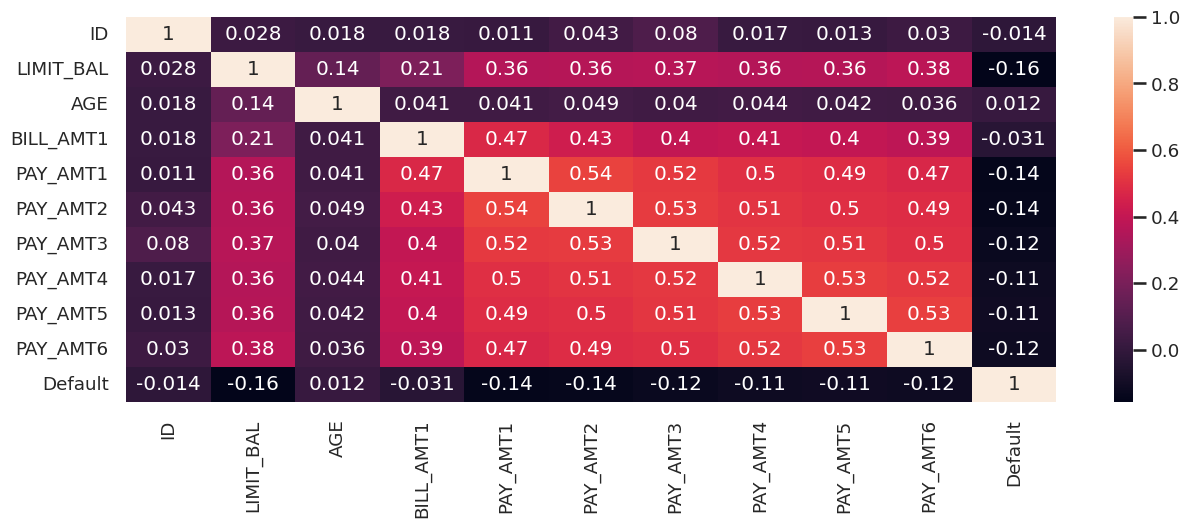

In [63]:
plt.figure(figsize=(15,5))
sns.heatmap(credit_df.corr(), annot=True) 

#### 2. Feature Selection

In [64]:
# Select your features wisely to avoid overfitting
credit_df.drop('ID',axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

We removed only the column which doesnot affect our final output

##### Which all features you found important and why?

The features that are important are :


In [65]:
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

###  Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

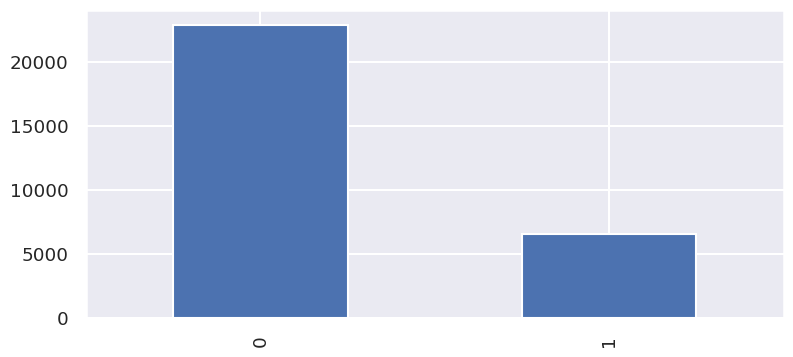

In [70]:
# bar chart for count
credit_df['Default'].value_counts().plot(kind='bar')
plt.show()

there is a huge difference in amount of data containing default and not defaulted

In [71]:
# Handling Imbalanced Dataset (If needed)
# we are using a technique called SMOTE to handle the imbalance of data
## Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

X = credit_df.drop(columns='Default')     
y = credit_df['Default']                  

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 22883, 1: 6527})
After Handling Imbalanced class Counter({1: 22883, 0: 22883})


we used a technique called SMOTE.The SMOTE technique involves creating synthetic samples for the minority class by interpolating between existing minority class samples.

###  Data Splitting

In [72]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
     

(36612, 18)
(9154, 18)


we used a test size of 20% .

###  Data Scaling

In [73]:
# Scaling your data
# Initialize the scaler

scaler = StandardScaler()

# Scale the features using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Develop predictive models


### ML Model - 1 - logistic Regression

In [74]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)
# Predict on the model
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, confusion_matrix
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6844750355074839
The accuracy on test data is  0.6844002621804676


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Compute precision
precision = precision_score(test_preds,y_test)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(test_preds,y_test)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(test_preds,y_test)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_preds,y_test)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.6689203925845147
Recall: 0.6910770617395223
F1 score: 0.6798182422697552
AUC: 0.6845970550427891


[[3198 1518]
 [1371 3067]]


[Text(0, 0.5, 'not defaulted'), Text(0, 1.5, 'defaulted')]

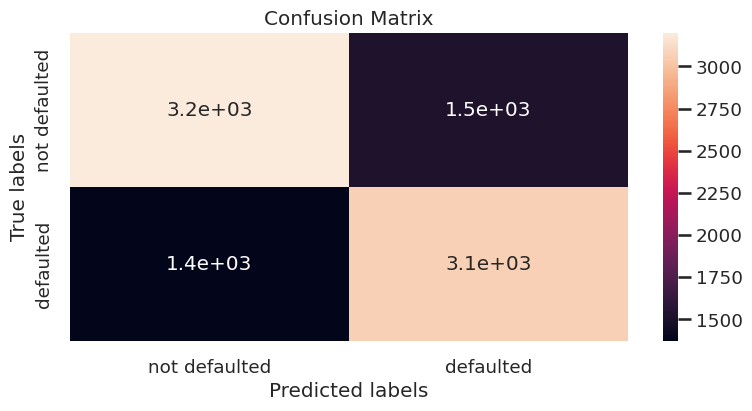

In [77]:
labels = ['not defaulted', 'defaulted']
cm = confusion_matrix(test_preds,y_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model

train_cv_preds = grid_result.predict(X_train)
test_cv_preds = grid_result.predict(X_test)



Best: 0.679324 using {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [79]:
# Compute precision
precision = precision_score(test_cv_preds, y_test)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(test_cv_preds, y_test)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(test_cv_preds, y_test)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_cv_preds, y_test)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.6798255179934569
Recall: 0.6891443732036259
F1 score: 0.6844532279314889
AUC: 0.6860751017389324


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

Not much improvement can be seen in here where roc_Auc_score increased from 0.681 to 0.686

### ML Model - 2 - Random Forest Classifier

In [80]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier()
# Fit the Algorithm
rf_model.fit(X_train,y_train)
# Predict on the model
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [81]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9995629848137223
The accuracy on test dataset is 0.8787415337557352


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[4216  353]
 [ 757 3828]]


[Text(0, 0.5, 'Not Defaulted'), Text(0, 1.5, 'Defaulted')]

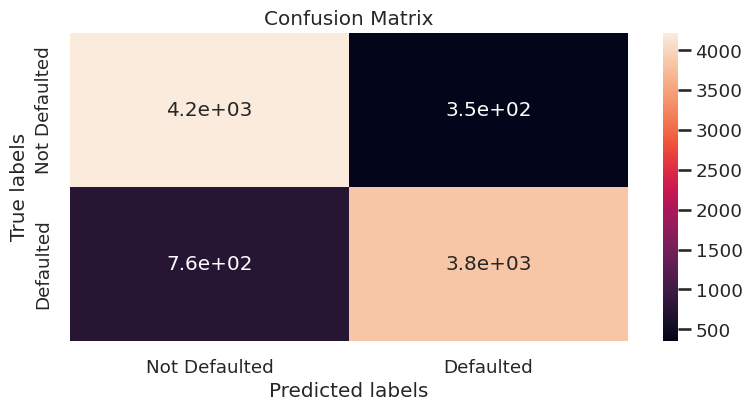

In [82]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for  test

labels = ['Not Defaulted', 'Defaulted']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Trained model showing an accuracy score of 99 % but on test data set it is only 87 % .It will be a case of overfitting .lets tune the hyper parameters and compare it again to see any changes

In [83]:
# Compute precision
precision = precision_score(test_class_preds, y_test)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(test_class_preds, y_test)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(test_class_preds, y_test)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_class_preds, y_test)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.8348964013086151
Recall: 0.9155704376943316
F1 score: 0.8733744010951404
AUC: 0.8816742194504235


#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_params = {'n_estimators': [50,75],           # number of trees in the ensemble
             'max_depth': [70,80],              # maximum number of levels allowed in each tree.
             'min_samples_split': [2,5],        # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,4]}         # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, verbose=2, n_jobs=-1)

# model fitting 
rf_gridsearch.fit(X_train,y_train)
     

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [70, 80], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 75]},
             verbose=2)

In [85]:
rf_gridsearch.best_estimator_

RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

In [86]:

rf_cv_model =RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

In [87]:
rf_cv_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, min_samples_leaf=3, n_estimators=75,
                       random_state=42)

In [88]:
# Making predictions on train and test data
train_class_preds = rf_cv_model.predict(X_train)
test_class_preds = rf_cv_model.predict(X_test)

In [89]:
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Not defaulted', 'defaulted']
cm_train = confusion_matrix(y_train, train_class_preds)
print(cm_train)
cm_test = confusion_matrix(y_test, test_class_preds)
print(cm_test)


[[17995   319]
 [ 1477 16821]]
[[4208  361]
 [ 784 3801]]


In [90]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     19472
           1       0.92      0.98      0.95     17140

    accuracy                           0.95     36612
   macro avg       0.95      0.95      0.95     36612
weighted avg       0.95      0.95      0.95     36612

 
roc_auc_score
0.9509312136270461


In [91]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      4992
           1       0.83      0.91      0.87      4162

    accuracy                           0.87      9154
   macro avg       0.87      0.88      0.87      9154
weighted avg       0.88      0.87      0.88      9154

 
roc_auc_score
0.8749984545702119


In [92]:
# Compute precision
precision = precision_score(y_test, test_class_preds)
print("Precision:", precision) 

# Compute recall    
recall = recall_score(y_test, test_class_preds)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_test, test_class_preds)
print("F1 score:", f1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_class_preds)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

Precision: 0.9132628543969246
Recall: 0.8290076335877863
F1 score: 0.8690979764490683
AUC: 0.8749984545702119


###  model used and the feature importance using  model explainability tool

In [93]:
# feature importance (Random Forest)
rf_importances = rf_model.feature_importances_

#Creating a dictonary 
rf_importance_dict = {'Feature RF' : list(X.columns),
                   'Feature Importance RF' : rf_importances}

#Creating the dataframe
rf_importance = pd.DataFrame(rf_importance_dict)
rf_sorting_features = rf_importance.sort_values(by=['Feature Importance RF'],ascending=False)

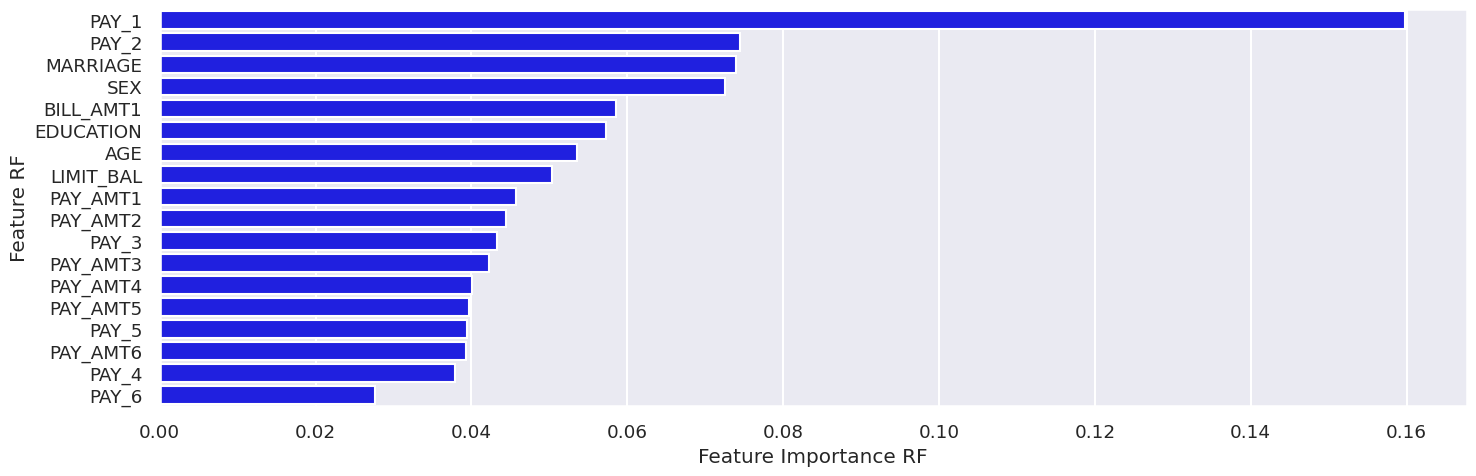

In [96]:

# plotting feature importance graph
fig,ax = plt.subplots(1,1, figsize=(15,5))
bar = sns.barplot(x='Feature Importance RF', y='Feature RF', data=rf_sorting_features, color='blue')


plt.tight_layout()
plt.show()

features like pay_1 , marriage for the model random forest is very important. For an example the feature PAY_1 have the highest importance in predicting and its feature importance is twice than any other features

## Prepare a concise report summarizing the analysis approach, key findings, and recommendations.

Analysis Approach:


we conducted an in-depth analysis of a credit card default dataset to understand the factors contributing to credit card defaults and provide actionable recommendations to mitigate the risk of default. The analysis involved data exploration, feature engineering, predictive modeling, and risk assessment techniques. The goal was to identify key patterns, trends, and risk indicators in the dataset and offer strategies to reduce credit card default rates.

Key Findings:

* **Demographic Factors:** We found that certain demographic factors, such as age, marital status, and education level, are significant predictors of credit card default. Younger individuals, unmarried individuals, and those with lower education levels tend to have higher default rates. This suggests the need for tailored credit assessment and risk management strategies for these specific demographic segments.

* **Payment History:** The payment history of credit card users emerged as a crucial factor influencing default rates. Individuals with a consistent history of timely payments are less likely to default on their credit card payments. This finding underscores the importance of encouraging responsible payment behavior and offering incentives for on-time payments.

* **Credit Utilization Ratio:** High credit utilization, where individuals use a significant portion of their available credit limit, is strongly associated with increased default risk. Monitoring and educating customers on managing their credit utilization can help mitigate default risks and improve overall creditworthiness.

* **Machine Learning Predictive Model:** By utilizing machine learning algorithms, we developed a predictive model that can identify customers at a higher risk of default. The model achieved a high level of accuracy, enabling proactive measures to be taken to prevent defaults. This model can be integrated into credit decision-making processes to enhance risk assessment and reduce default rates.

Recommendations:

* Targeted Risk Assessment: Incorporate demographic factors such as age, marital status, and education level into credit assessment models to identify customers who may be at higher risk of default. Tailor risk management strategies and credit limits accordingly to mitigate default risks.

* Payment Behavior Education: Implement educational programs and personalized communication to promote responsible payment behavior. Provide guidance on the importance of timely payments, budgeting, and financial planning to reduce the likelihood of default. Since people having higher education shows more accountability 

* Credit Limit Monitoring: Continuously monitor and analyze customers' credit utilization ratios. Proactively reach out to customers approaching high credit utilization thresholds and offer guidance on managing their credit wisely to minimize default risks.

* Early Intervention and Assistance: Develop early warning systems to identify customers showing signs of financial distress. Implement proactive measures, such as offering financial counseling or flexible repayment options, to help customers navigate challenging financial situations and prevent defaults.

# **Conclusion:**
This analysis provided valuable insights into credit card default risk factors and offered actionable recommendations to mitigate default rates. By incorporating these findings and recommendations, we can enhance credit risk assessment, improve customer engagement, and proactively manage credit card defaults. It is crucial to regularly monitor credit card portfolio performance, evaluate the effectiveness of risk management strategies, and adapt them as needed to ensure sustained reduction in default rates.